In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
cal = fetch_california_housing()

In [5]:
print(cal.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
print(cal.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [9]:
df = pd.DataFrame(cal.data, columns=cal.feature_names)

In [12]:
df['Price'] = cal.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [17]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [19]:
regression.coef_, regression.intercept_

(array([ 8.49221760e-01,  1.22119309e-01, -2.99558449e-01,  3.48409673e-01,
        -8.84488134e-04, -4.16980388e-02, -8.93855649e-01, -8.68616688e-01]),
 np.float64(2.0692396089424165))

In [20]:
y_pred = regression.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')
absolute = 1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

Mean Squared Error: 0.5305677824766752
Mean Absolute Error: 0.5272474538305952
Root Mean Squared Error: 0.7284008391515452
R2 Score: 0.5957702326061665


In [23]:
absolute

0.5952472117200027

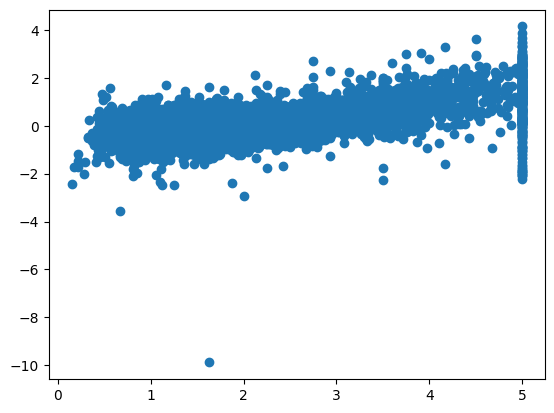

In [24]:
residu = y_test - y_pred
plt.scatter(y_test, residu)

C:\Users\arjun\AppData\Local\Temp\ipykernel_23872\113536192.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residu, kde=True)


<Axes: xlabel='Price', ylabel='Density'>

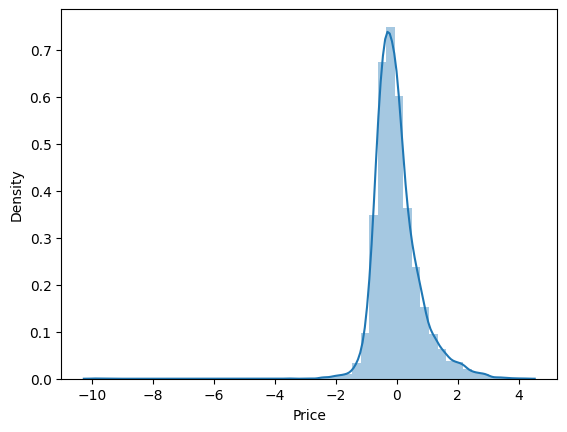

In [25]:
import seaborn as sns
sns.distplot(residu, kde=True)

In [27]:
import pickle
pickle.dump(regression, open('model.pkl', 'wb'))

In [28]:
model = pickle.load(open('model.pkl', 'rb'))